**Installing required libraries and keras_ocr**

In [ ]:
!pip install --force-reinstall -v "tensorflow==2.15.1"
from IPython.display import clear_output
clear_output()

In [ ]:
!pip install keras-ocr
clear_output()

In [ ]:
import keras_ocr
import matplotlib.pyplot as plt

Pipeline for OCR

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()      # Pipeline is used to simplify the detection and recognition process. We can use them seperately using keras_ocr.detection.Detector() and keras_ocr.recognition.Recognizer()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


Mounting drive for accessing dataset

In [ ]:
from google.colab import drive
import os
import keras_ocr
from PIL import Image
import numpy as np


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset collection

In [ ]:
german_image = '/content/drive/MyDrive/german_dataset'
english_image = '/content/drive/MyDrive/english_dataset'

# Sort the images by extracting numerical parts from filenames
german_image_paths = sorted(
    [os.path.join(german_image, f) for f in os.listdir(german_image) if f.lower().endswith(('png', 'jpg', 'jpeg'))],
    key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1])
)

english_image_paths = sorted(
    [os.path.join(english_image, f) for f in os.listdir(english_image) if f.lower().endswith(('png', 'jpg', 'jpeg'))],
    key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1])
)


In [ ]:
german_image_paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
english_image_paths

If want to access image using URL

In [ ]:
# urls =  [
#         'https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/207141041/original/a6894a4cd1db996ad97ba1b8347d986975a12a32/proof-read-your-german-text.png',
#         'https://i.pinimg.com/originals/9b/35/ff/9b35ffaeb4de11f88fbf6b2fe860fb12.jpg',
#         'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfA3pKDpplSaJwgdx6g35VIj7poJCJgJT_nzQuMo3fSKcKmXeUiH9Ri485szayTjI6c0E&usqp=CAU'
#         ]

# import requests
# indx = 0
# for url in urls:
#     indx=indx+1
#     try:
#         response = requests.get(url)
#         response.raise_for_statuestException as e:
#         print(f"Error accessing s()
#         print(f"URL number : {indx} is accessible.")
#     except requests.exceptions.RequURL number: {indx}")

In [ ]:
prediction_groups = pipeline.recognize(german_image_paths)


In [ ]:
# images = [
#     keras_ocr.tools.read(url) for url in urls
# ]
# predicted_groups = pipeline.recognize(images)

In [ ]:
prediction_groups_eng = pipeline.recognize(english_image_paths)


In [ ]:
 german_image_arrays = []
for image_path in german_image_paths:
    img = Image.open(image_path)
    img_array = np.array(img)
    german_image_arrays.append(img_array)
english_image_arrays = []
for image_path in english_image_paths:
    img = Image.open(image_path)
    img_array = np.array(img)
    english_image_arrays.append(img_array)

Visualizing german extracted text

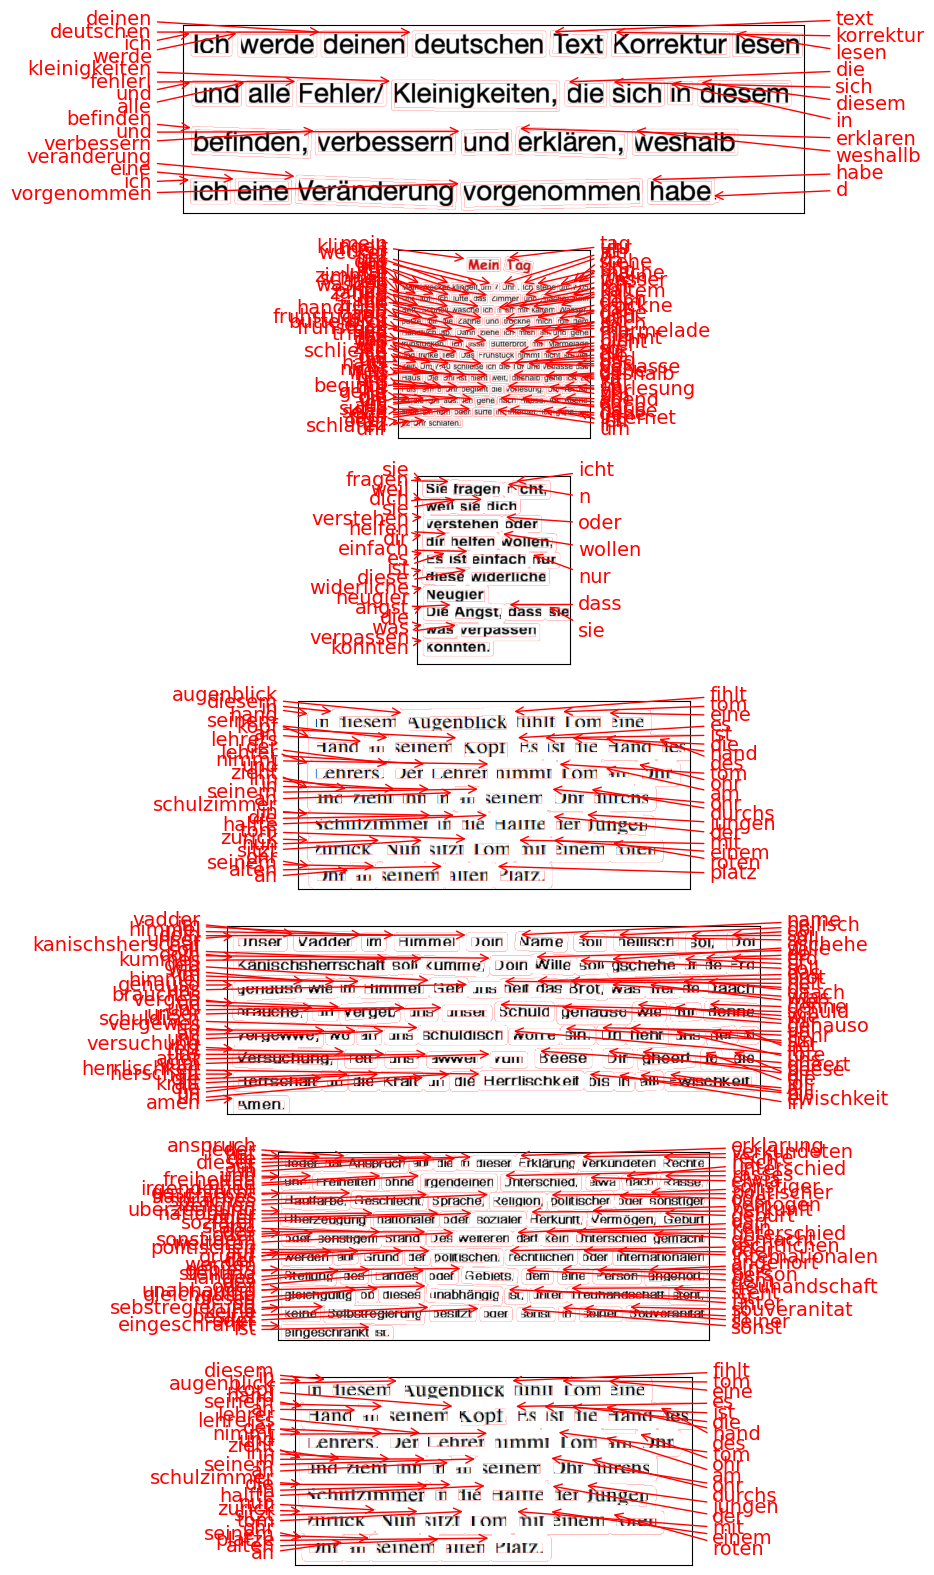

In [ ]:
fig, axs = plt.subplots(nrows=len(german_image_arrays), figsize=(30, 20))
for ax, image, predictions in zip(axs, german_image_arrays, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

Visualizing english extracted text

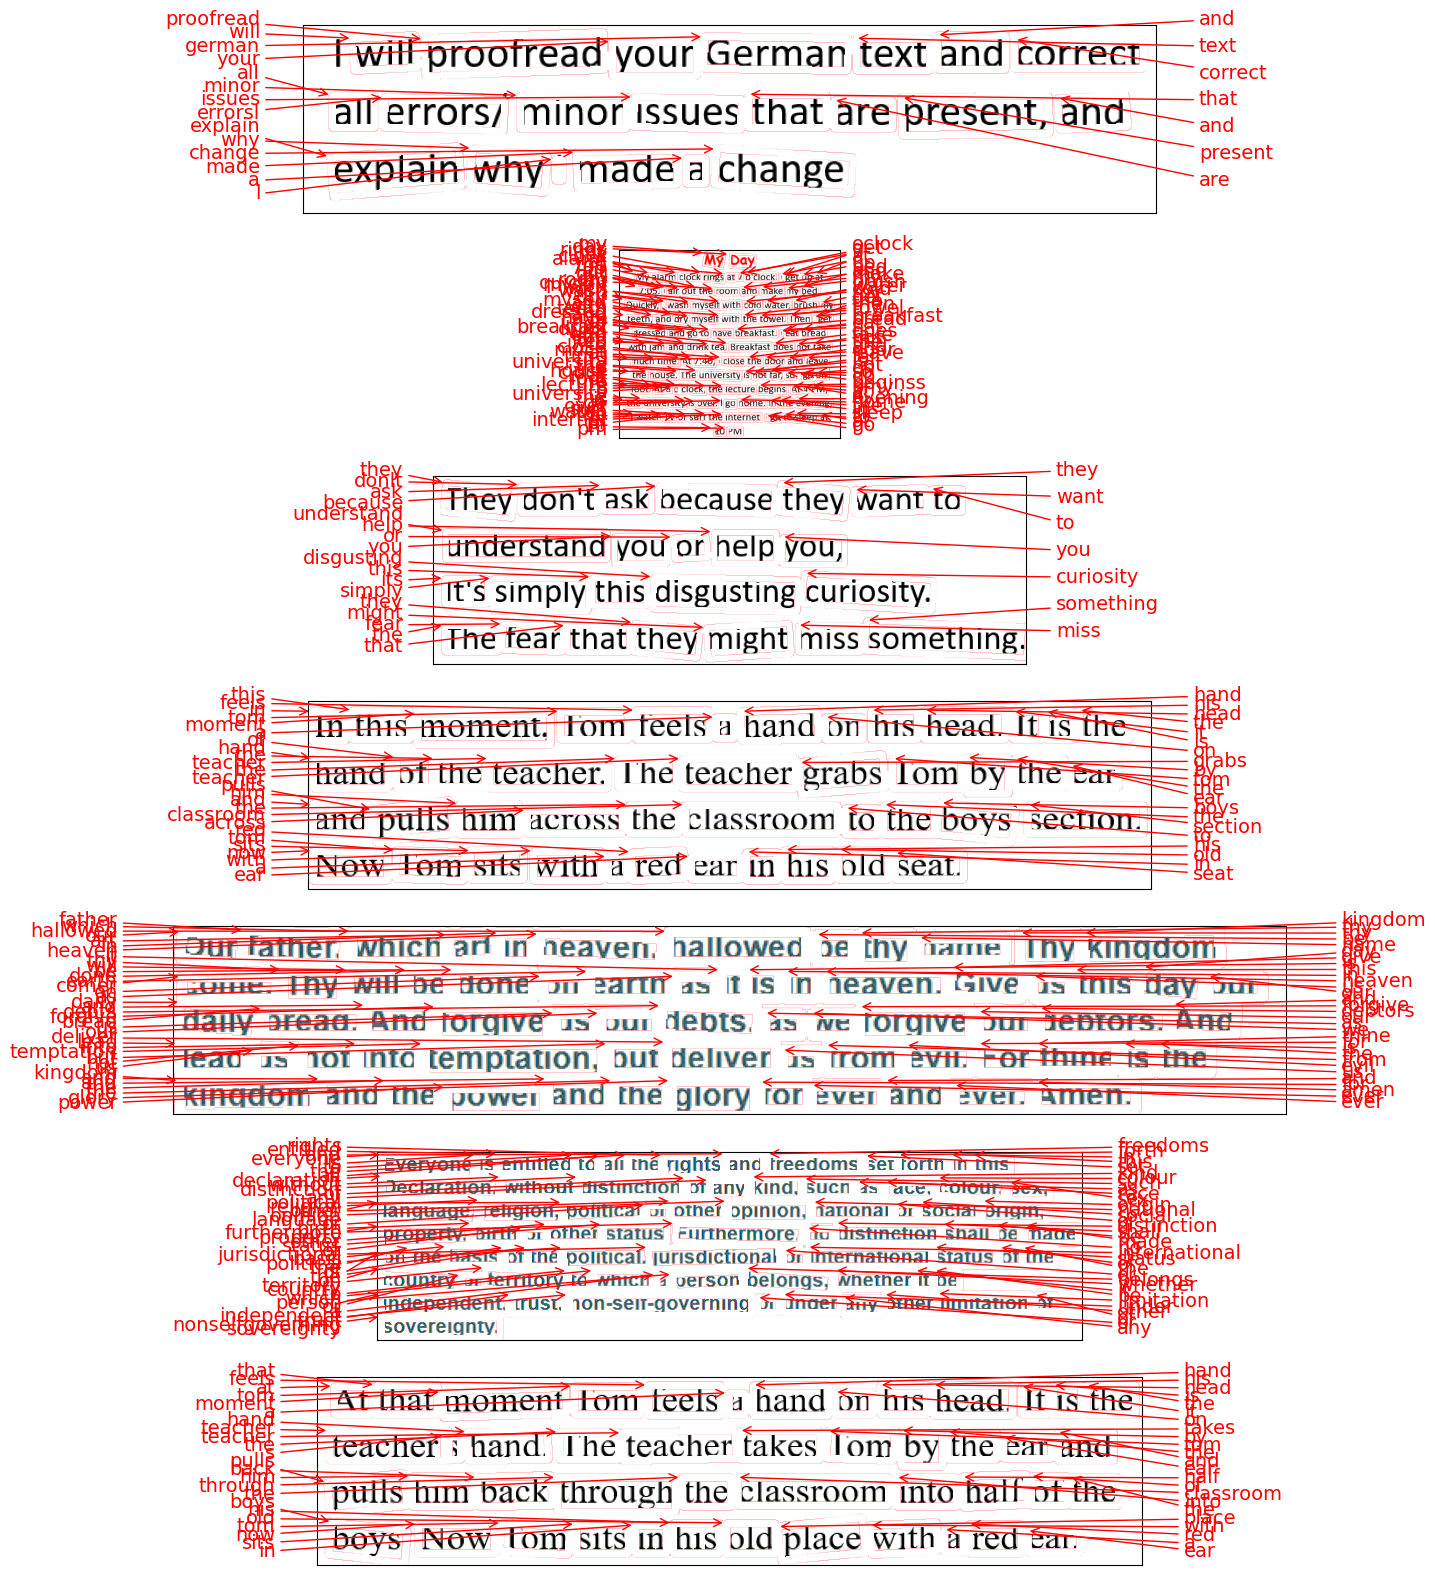

In [ ]:
fig, axs = plt.subplots(nrows=len(english_image_arrays), figsize=(30, 20))
for ax, image, predictions in zip(axs, english_image_arrays, prediction_groups_eng):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

Sorting via boxes indexes to get the more optimum order of words

In [ ]:

def extract_paragraphs(predicted_groups):                   # Function that takes in OCR predictions (predicted_groups) and processes them into structured paragraphs.
    paragraphs = []
    for predicted_image in predicted_groups:
        predictions_sorted = sorted(predicted_image, key=lambda x: (min(x[1], key=lambda p: p[1])[1], min(x[1], key=lambda p: p[0])[0]))
        paragraph = ""
        for text, box in predicted_image:
            paragraph += text + " "

        paragraph = paragraph.strip()
        paragraphs.append(paragraph)

    return paragraphs


german_paragraphs = extract_paragraphs(prediction_groups)
english_paragraphs = extract_paragraphs(prediction_groups_eng)


In [ ]:
print(len(german_paragraphs))
print(len(english_paragraphs))

7
7


In [ ]:
for paragraph in german_paragraphs:
  print(paragraph)

deinen deutschen text korrektur ich werde lesen fehlerl kleinigkeiten und alle die sich diesem in befinden verbessern und erklaren weshallb veranderung ich eine habe vorgenommen d
mein tag mein wecker klingelt 7 uhr ich 7 05 stehe um um uhr auf ich lufte das zimmer und mache mein schnell wasser bett wasche ich ich mit kaltem m zahne die und mich dem putze mir trockne mit handtuch ab dann ziehe ich mich und gehe an fruhstucken ich butterbrot marmelade mit esse fruhstuck und trinke tee das nimmt nicht viel so 740 tur zeit um schlielse ich die und das verlasse die uni haus ist nicht weit deshalb gehe ich zu fuls uhr 16 uhr um 8 beginnt die vorlesung um am abend ist die uni ich gehe nach hause aus surfe sehe ich fern oder internet ich gehe im um 22 uhr schlafen
sie fragen icht n weil sie dich verstehen oder helfen dir wollen einfach es ist nur diese widerliche neugier die angst dass sie was verpassen konnten
diesem augenblick fihlt tom eine in hand seinem kopf es ist die hand des an lehrer

In [ ]:
for paragraph in english_paragraphs:
  print(paragraph)

proofread and will german text correct your that and all minor issues present errorsl are explain made change why l a
my day clock oclock my alarm rings 7 at get l at up the and make bed 705 air out l room my quickly wash myself with cold brush water i my and dry myself with teeth the towel then get i dressed breakfast bread and have eat to l go drink breakfast with and does take jam tea not much 740 close the door and at leave time l the house the far is university not on so l go clock foot at beginss 8 the lecture at pmy 4 o the home the university in evening is over go watch surf the tv internet sleep to at or l go 10 pm
donlt they ask because they want to understand help or you you its this disgusting simply curiosity fear might something the that they miss
this feels hand his head the in tom it is moment a on of grabs hand the teacher the teacher tom by the ear him and pulls the classroom the boys section to across his old now tom sits with red in seat a ear
our which hallowed kin

In [ ]:
!pip install transformers
clear_output()

In [ ]:
!pip install sacremoses       # Python library for text tokenization, detokenization, and other text preprocessing tasks, particularly in machine translation.
clear_output()                # tokenizer is a tool or algorithm in Natural Language Processing (NLP) that splits text into smaller units called tokens

In [ ]:
# File paths for saving German and English paragraphs
source_file = "source.txt"
target_file = "target.txt"

# Writing German paragraphs to source.txt
with open(source_file, "w", encoding="utf-8") as src_file:
    for paragraph in german_paragraphs:
        src_file.write(paragraph + "\n")

# Writing English paragraphs to target.txt
with open(target_file, "w", encoding="utf-8") as tgt_file:
    for paragraph in english_paragraphs:
        tgt_file.write(paragraph + "\n")

print(f"German paragraphs saved to {source_file}")
print(f"English paragraphs saved to {target_file}")

German paragraphs saved to source.txt
English paragraphs saved to target.txt


Helsinki-NLP/opus-mt-de-en Model for german to english translation

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

model_name = "Helsinki-NLP/opus-mt-de-en"

# Load Marian tokenizer and model
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import Dataset

class TranslationDataset(Dataset):
    def __init__(self, tokenizer, source_file, target_file, max_length=128):
        self.tokenizer = tokenizer
        self.source_sentences = open(source_file, encoding="utf-8").readlines()
        self.target_sentences = open(target_file, encoding="utf-8").readlines()
        self.max_length = max_length

    def __len__(self):
        return len(self.source_sentences)

    def __getitem__(self, idx):
        source = self.source_sentences[idx].strip()
        target = self.target_sentences[idx].strip()

        source_enc = self.tokenizer(
            source,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        target_enc = self.tokenizer(
            target,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        # Shift the target tokens for the decoder
        labels = target_enc["input_ids"].squeeze()
        labels[labels == self.tokenizer.pad_token_id] = -100  # Ignore padding in loss computation

        return {
            "input_ids": source_enc["input_ids"].squeeze(),
            "attention_mask": source_enc["attention_mask"].squeeze(),
            "labels": labels
        }

# Initialize dataset
dataset = TranslationDataset(
    tokenizer,
    source_file="source.txt",
    target_file="target.txt"
)
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./fine_tuned_model",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    logging_dir="./logs",
    num_train_epochs=3,
    save_steps=500,
    evaluation_strategy="steps",
    logging_steps=100,
    save_total_limit=2,
    learning_rate=5e-5,
    fp16=True  # Use mixed precision if supported by your GPU
)



trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=dataset,
    tokenizer=tokenizer
)

trainer.train()

model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")

from transformers import MarianMTModel, MarianTokenizer

model = MarianMTModel.from_pretrained("./fine_tuned_model")
tokenizer = MarianTokenizer.from_pretrained("./fine_tuned_model")


for i in range(len(german_paragraphs)):
    inputs = tokenizer.encode(german_paragraphs[i], return_tensors="pt", truncation=True)
    outputs = model.generate(inputs)
    english_paragraphs[i] = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(english_paragraphs[i])


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-26-6d097099715d>:72: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

Testing the model with test_sentence

In [ ]:
test_sentence = "Berlin besitzt neben ausgedehnten Waldgebieten im Westen und Südosten des Stadtgebietes viele große Parkanlagen."
inputs = tokenizer.encode(test_sentence, return_tensors="pt", truncation=True)
outputs = model.generate(inputs)
english_translation = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(english_translation)

Testing on extracted german text

In [ ]:
inputs = tokenizer.encode(german_paragraphs[0], return_tensors="pt", truncation=True)
outputs = model.generate(inputs)
english_translation = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(english_translation)

your German text correction I will read flawed pettynesses and all those who are in it improve and explain weshallb change I have made a


Corresponding English text extracted using keras_ocr

In [ ]:
for i in range(len(german_paragraphs)):
    print(english_paragraphs[i])



your German text correction I will read flawed pettynesses and all those who are in it improve and explain weshallb change I have made a
my day my wacker rings 7 o'clock I 7 05 stand around clock on I air the room and make my fast water bed I wash with cold m teeth and clean me with drying cloth from then I pull off and go to rest I put butterbread jam with food rest and drink tea that doesn't take so much 740 tur time around schliels I the and leave the uni house is not far therefore I go to fuls clock 16 o'clock at 8 starts the lecture around the evening is the uni I go to home from surf I watch TV or internet I go to sleep in at 22 o'clock
they don't ask me 'cause they want to understand you or help you just it's just this disgusting neugier that's afraid they could miss something
this eye-catching tom one in his head it is the hand of the teacher the teacher takes tom ear on and pulls him in his ear through the schoolroom in the helped boys the tom tom now sits with a red ear to hi